# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import scipy.stats as sts


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        record= record + 1
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=khatanga
City not found. Skipping...
Processing Record 2 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=castro
Processing Record 3 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=ribeira grande
Processing Record 4 | Bachaquero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=bachaquero
Processing Record 5 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=hasaki
Processing Record 6 | Birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=birao
Processing Record 7 | Buenos Aires
http://api.openweath

Processing Record 56 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=carnarvon
Processing Record 57 | São Domingos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=sao domingos
Processing Record 58 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=dikson
Processing Record 59 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=jamestown
Processing Record 60 | Muroto-misakicho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=muroto
City not found. Skipping...
Processing Record 61 | Rabak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=rabak
Processing Record 62 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 111 | Hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=hirara
Processing Record 112 | Caibarién
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=caibarien
Processing Record 113 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=comodoro rivadavia
Processing Record 114 | Gisborne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=gisborne
Processing Record 115 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=qaanaaq
Processing Record 116 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=codrington
Processing Record 117 | Greenland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17

Processing Record 166 | Constitución
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=constitucion
Processing Record 167 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=palmer
Processing Record 168 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=chuy
Processing Record 169 | Kempsey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=kempsey
Processing Record 170 | Kingaroy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=kingaroy
Processing Record 171 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=tiksi
Processing Record 172 | Arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=arlit
Pro

Processing Record 223 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=auki
Processing Record 224 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=yulara
Processing Record 225 | Barkot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=barkot
Processing Record 226 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=college
Processing Record 227 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=port alfred
Processing Record 228 | Yemtsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=yemtsa
Processing Record 229 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=aksu
Processin

Processing Record 279 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=mount isa
Processing Record 280 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=kununurra
Processing Record 281 | Podgorodnyaya Pokrovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=podgorodnyaya pokrovka
Processing Record 282 | Birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=birjand
Processing Record 283 | Cao Bang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=cao bang
Processing Record 284 | Obo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=obo
Processing Record 285 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 335 | Werda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=werda
Processing Record 336 | Ust'-Omchug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=ust-omchug
Processing Record 337 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=isangel
Processing Record 338 | Ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=ossora
Processing Record 339 | Agidel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=agidel
Processing Record 340 | Gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=gorontalo
Processing Record 341 | Namalenga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=na

Processing Record 391 | Sabzawār
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=sabzevar
Processing Record 392 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=cabo san lucas
Processing Record 393 | Eresós
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=eresos
Processing Record 394 | Lithgow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=lithgow
Processing Record 395 | Anito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=anito
Processing Record 396 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=belmonte
Processing Record 397 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f

Processing Record 447 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=kieta
Processing Record 448 | Shulan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=shulan
Processing Record 449 | Lamar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=lamar
Processing Record 450 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=yumen
Processing Record 451 | Chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=chumikan
Processing Record 452 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=puerto del rosario
Processing Record 453 | Sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941

Processing Record 503 | Tuensang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=tuensang
Processing Record 504 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=mandalgovi
Processing Record 505 | Les Cayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=les cayes
Processing Record 506 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=oistins
Processing Record 507 | Boa Viagem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=boa viagem
Processing Record 508 | Anda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=anda
Processing Record 509 | Fort Myers Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc6

Processing Record 559 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=atar
Processing Record 560 | San Gabriel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=san gabriel
Processing Record 561 | Dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=dakar
Processing Record 562 | Mapimí
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=mapimi
Processing Record 563 | Phang Nga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=phangnga
Processing Record 564 | Guane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=guane
City not found. Skipping...
Processing Record 565 | Lubumbashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherpy_dict = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
})
weatherpy_dict.count()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64

In [5]:
weatherpy_dict.to_csv('cities.csv')
weatherpy_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khatanga,1,RU,1597435367,57,71.97,102.50,49.55,15.59
1,Castro,42,BR,1597435221,75,-24.79,-50.01,69.58,5.10
2,Ribeira Grande,40,PT,1597435370,83,38.52,-28.70,75.20,11.41
3,Bachaquero,53,VE,1597435371,61,9.97,-71.15,89.24,8.70
4,Hasaki,20,JP,1597435305,100,35.73,140.83,78.80,3.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

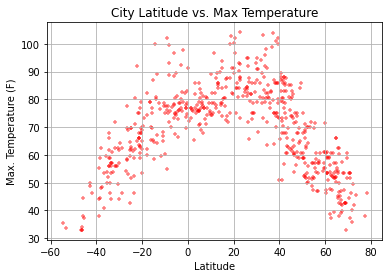

In [7]:
plt.scatter(weatherpy_dict['Lat'], weatherpy_dict['Max Temp'], marker = '+',s = 15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

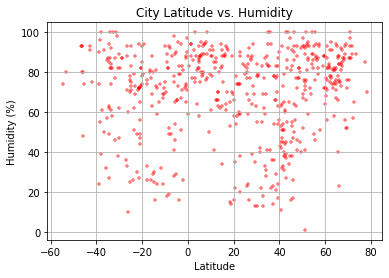

In [8]:
plt.scatter(weatherpy_dict['Lat'], weatherpy_dict['Humidity'], marker = '+',s=15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

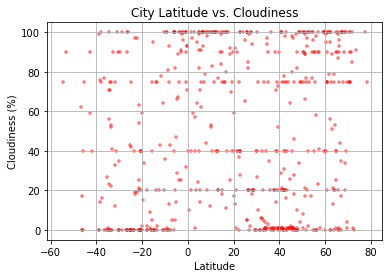

In [9]:
plt.scatter(weatherpy_dict["Lat"], weatherpy_dict["Cloudiness"], marker="+", s=15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

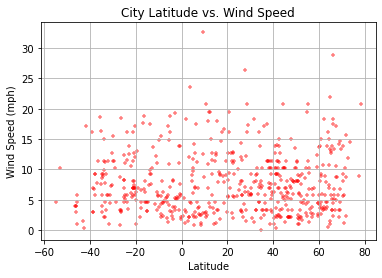

In [10]:
plt.scatter(weatherpy_dict["Lat"], weatherpy_dict["Wind Speed"], marker="+", s=15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_eq (x,y):
    print(f"The r-squared is : {round(sts.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq


def slope_eq(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=18, color="red")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weatherpy_dict.loc[weatherpy_dict["Lat"] >= 0]
southern_hemisphere = weatherpy_dict.loc[weatherpy_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.72


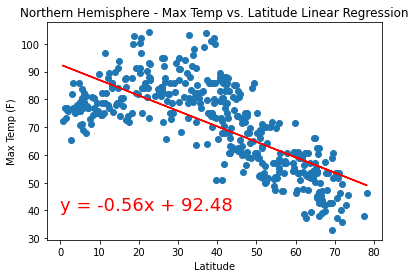

In [15]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
slope_eq(eq, 0, 40)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


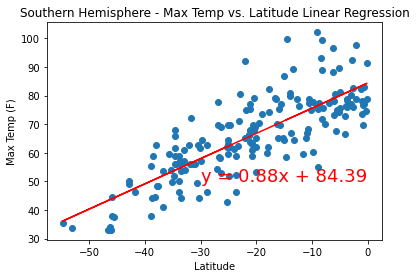

In [17]:
eq = linear_eq(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
slope_eq(eq, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05


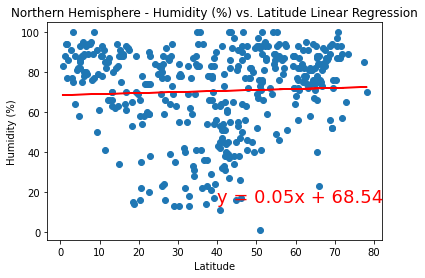

In [20]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
slope_eq(eq, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.12


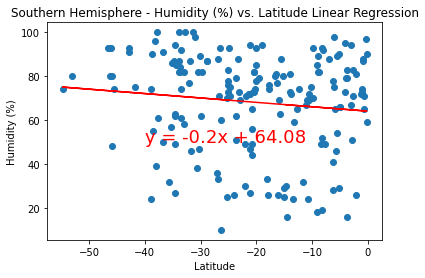

In [21]:
eq = linear_eq(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
slope_eq(eq, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


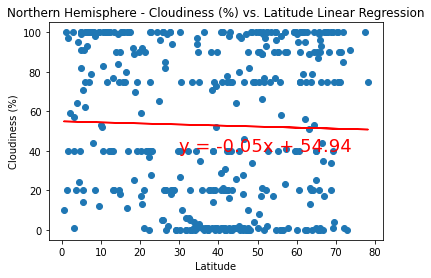

In [22]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
slope_eq(eq, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.18


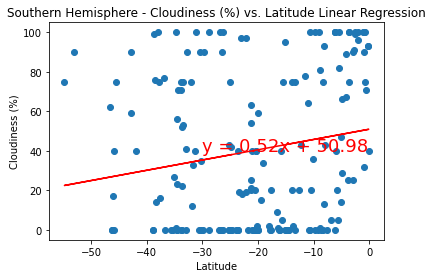

In [23]:
eq = linear_eq(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
slope_eq(eq, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0


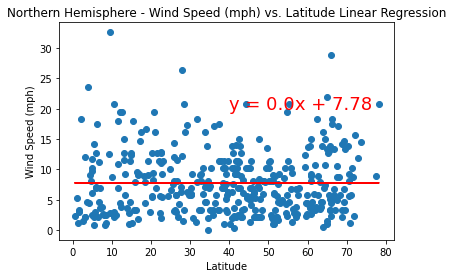

In [24]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
slope_eq(eq, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.01


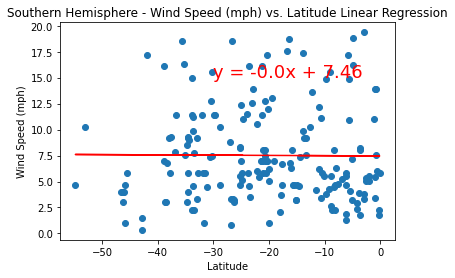

In [25]:
eq = linear_eq(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
slope_eq(eq, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()